In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import itertools
import matplotlib
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn import model_selection, svm

In [ ]:
#default theme
plt.style.use('ggplot')
sns.color_palette("tab10")
sns.set(context='notebook', style='darkgrid', font='sans-serif', font_scale=1, rc=None)
matplotlib.rcParams['figure.figsize'] =[20,8]
matplotlib.rcParams.update({'font.size': 15})
matplotlib.rcParams['font.family'] = 'sans-serif'

In [ ]:
#Read the data
fake= pd.read_csv("/content/drive/MyDrive/Fake.csv")
true= pd.read_csv("/content/drive/MyDrive/True.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
fake.shape


(23481, 4)

In [ ]:
true.shape

(21417, 4)

In [ ]:
# Add flag to track fake and real
fake['target'] = 'fake'
true['target'] = 'true'

In [ ]:
fake.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [ ]:
true.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",true
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",true
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",true
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",true


In [ ]:
# Concatenate dataframes
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44898, 5)

In [ ]:
data.head(5)

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [ ]:
data.tail(5)

,title,text,subject,date,target
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",true
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",true
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",true
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",true
44897,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",true


In [ ]:
# Shuffle the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [ ]:
# Check the data
data.head()

,title,text,subject,date,target
0,Report: GOP Voters Are Too Stupid to Know Jeb...,It s no secret that our frenemies on the Right...,News,"February 15, 2016",fake
1,FLASHBACK: VULGAR OBAMA EXPOSES Erection To Fe...,What a funny guy! I m sure every woman on that...,politics,"Oct 12, 2016",fake
2,Is North Korea’s Kim Jong-un Considering Using...,What will he think of next? Is Kim Jong-un is ...,left-news,"Aug 28, 2017",fake
3,CROOKED DEMOCRAT Congresswoman Corrine Brown F...,"Celebrated Congressional Black Caucus member, ...",left-news,"Nov 18, 2017",fake
4,AWESOME: PATRIOTS AND SHERIFF STAND GUARD As F...,Do you hear that sucking sound? That s the Oba...,left-news,"Aug 7, 2015",fake


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   target   44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


In [ ]:
# Removing the date 
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,Report: GOP Voters Are Too Stupid to Know Jeb...,It s no secret that our frenemies on the Right...,News,fake
1,FLASHBACK: VULGAR OBAMA EXPOSES Erection To Fe...,What a funny guy! I m sure every woman on that...,politics,fake
2,Is North Korea’s Kim Jong-un Considering Using...,What will he think of next? Is Kim Jong-un is ...,left-news,fake
3,CROOKED DEMOCRAT Congresswoman Corrine Brown F...,"Celebrated Congressional Black Caucus member, ...",left-news,fake
4,AWESOME: PATRIOTS AND SHERIFF STAND GUARD As F...,Do you hear that sucking sound? That s the Oba...,left-news,fake


In [ ]:
# Removing the title
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,It s no secret that our frenemies on the Right...,News,fake
1,What a funny guy! I m sure every woman on that...,politics,fake
2,What will he think of next? Is Kim Jong-un is ...,left-news,fake
3,"Celebrated Congressional Black Caucus member, ...",left-news,fake
4,Do you hear that sucking sound? That s the Oba...,left-news,fake


In [ ]:
# Convert to lowercase

data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,it s no secret that our frenemies on the right...,News,fake
1,what a funny guy! i m sure every woman on that...,politics,fake
2,what will he think of next? is kim jong-un is ...,left-news,fake
3,"celebrated congressional black caucus member, ...",left-news,fake
4,do you hear that sucking sound? that s the oba...,left-news,fake


In [ ]:
# Remove punctuation

import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [ ]:
# Check
data.head()

,text,subject,target
0,it s no secret that our frenemies on the right...,News,fake
1,what a funny guy i m sure every woman on that ...,politics,fake
2,what will he think of next is kim jongun is pr...,left-news,fake
3,celebrated congressional black caucus member a...,left-news,fake
4,do you hear that sucking sound that s the obam...,left-news,fake


In [ ]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data.head()

,text,subject,target
0,secret frenemies right stupid conservatism rac...,News,fake
1,funny guy sure every woman campaign plane viol...,politics,fake
2,think next kim jongun preparing special forces...,left-news,fake
3,celebrated congressional black caucus member l...,left-news,fake
4,hear sucking sound obama regime sucking freedo...,left-news,fake


subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


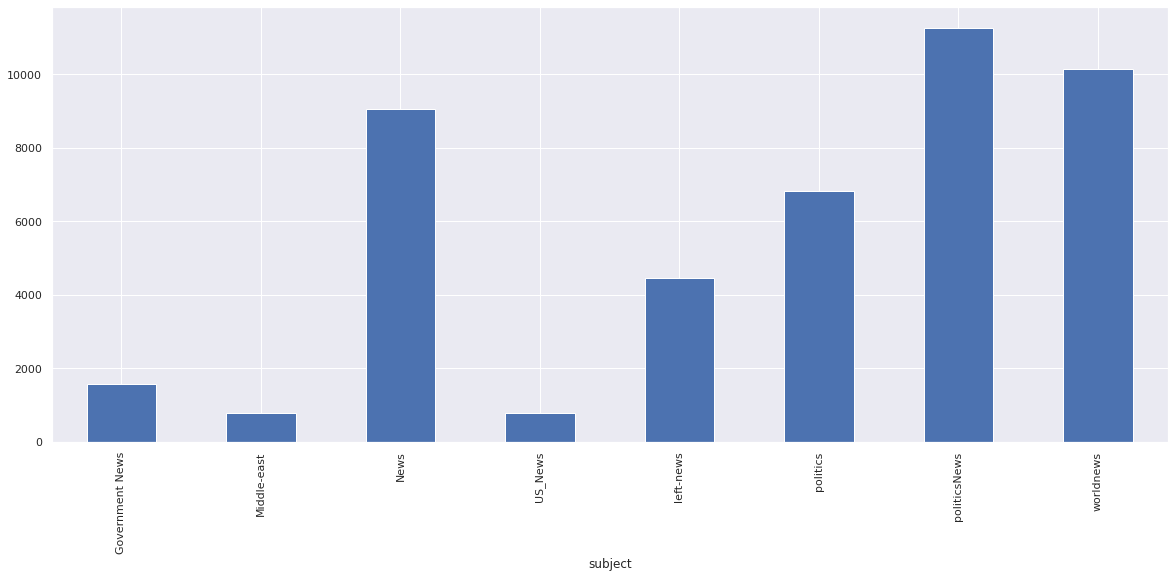

In [ ]:
# How many articles per subject?
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
fake    23481
true    21417
Name: text, dtype: int64


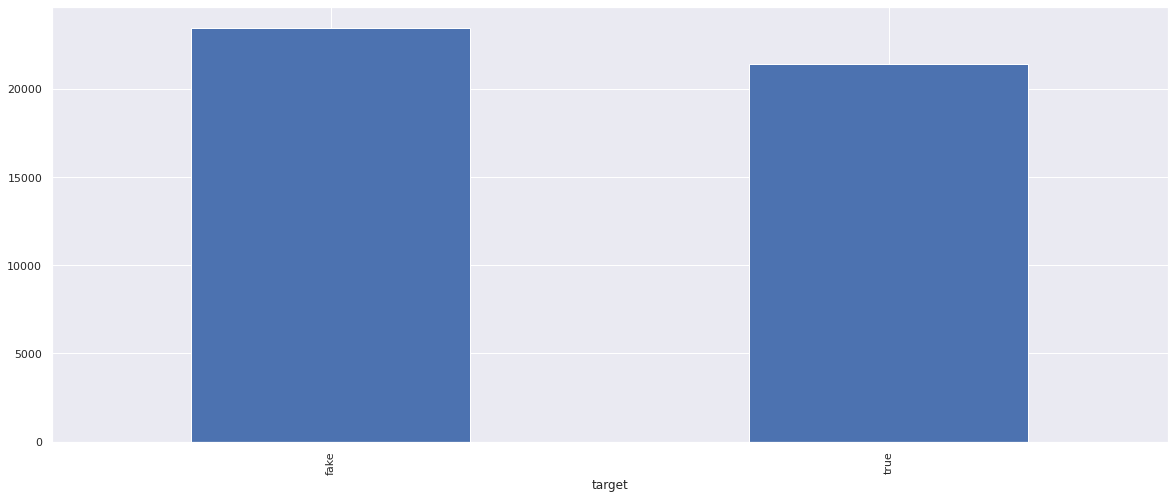

In [ ]:
# How many fake and real articles?
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

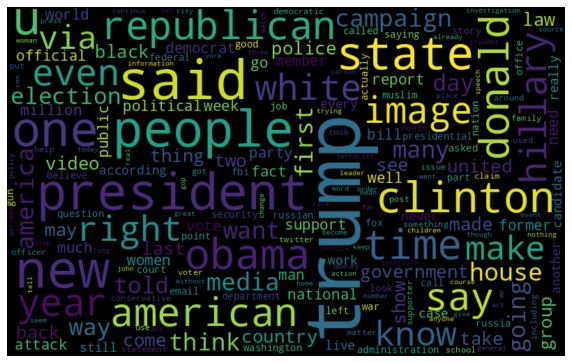

In [ ]:
# Word cloud for fake news
from wordcloud import WordCloud

fake_data = data[data["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

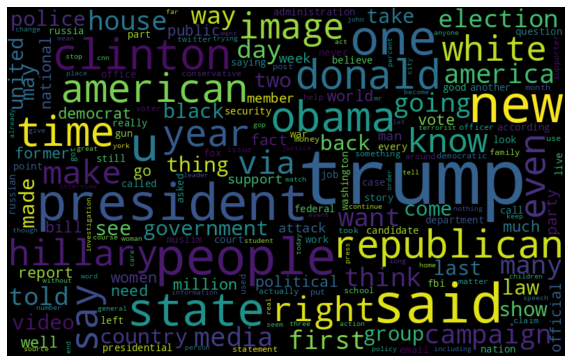

In [ ]:
# Word cloud for real news
from wordcloud import WordCloud

real_data = data[data["target"] == "true"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Most frequent words counter   
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

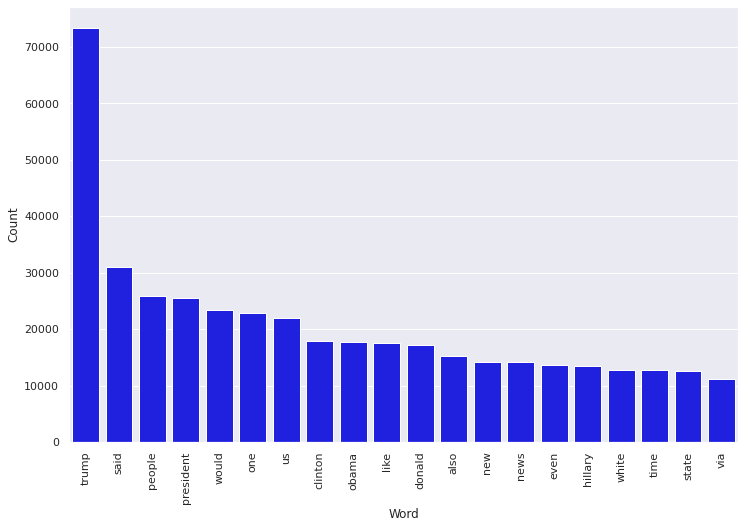

In [ ]:
# Most frequent words in fake news
counter(data[data["target"] == "fake"], "text", 20)

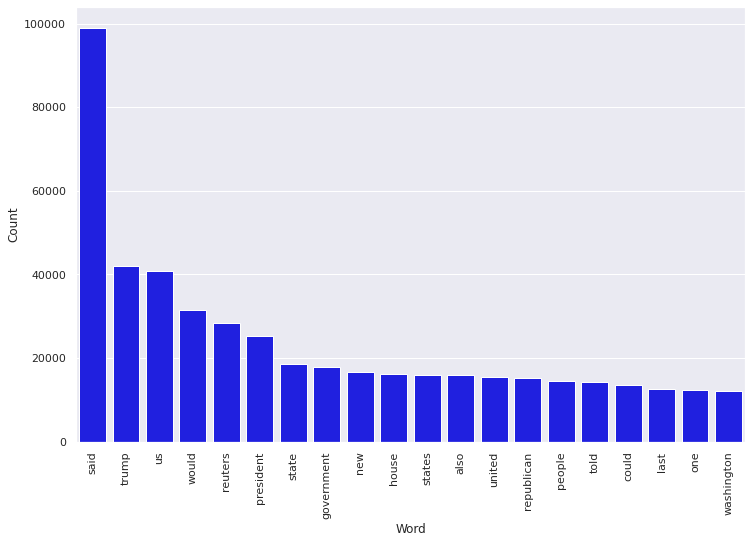

In [ ]:
# Most frequent words in real news
counter(data[data["target"] == "true"], "text", 20)

In [ ]:
# Function to plot the confusion matrix
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
# Split the data
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

In [ ]:
X_train.head()

36335    moscow reuters kremlin thursday called us deci...
12384    san francisco reuters facebook inc said wednes...
24419    berlin reuters german parties must willing com...
24740    trump administration hired tiny twoman energy ...
27039    thank angela merkel german security service bf...
Name: text, dtype: object

In [ ]:
y_train.head()

36335    true
12384    true
24419    true
24740    fake
27039    fake
Name: target, dtype: object

In [ ]:
#Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.65%


In [ ]:
#DataFlair - Build confusion matrix
confusion_matrix(y_test,prediction, labels=['fake','true'])

array([[4702,   11],
       [  20, 4247]])

Confusion matrix, without normalization


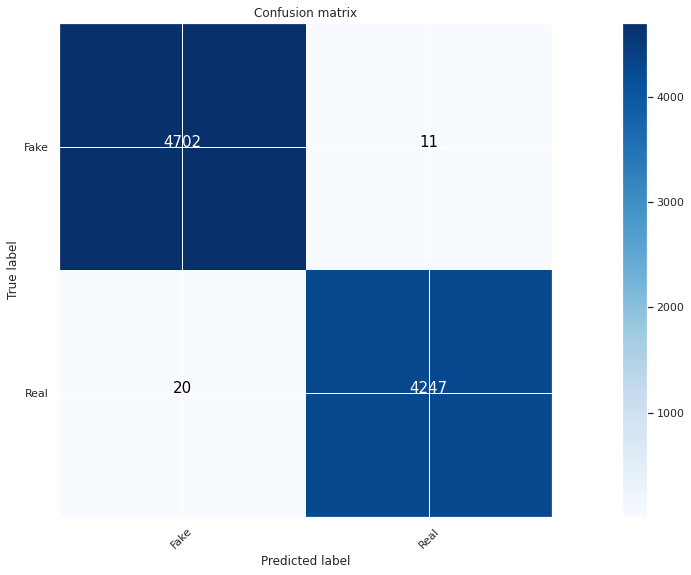

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [ ]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

        fake       1.00      1.00      1.00      4713
        true       1.00      1.00      1.00      4267

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



In [ ]:
#Passive aggressive Classifier

In [ ]:
#DataFlair - Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

#DataFlair - Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(X_train) 
tfidf_test=tfidf_vectorizer.transform(X_test)

In [ ]:
#DataFlair - Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

#DataFlair - Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print("accuracy: {}%".format(round(accuracy_score(y_test, y_pred)*100,2)))

accuracy: 99.34%


In [ ]:
#DataFlair - Build confusion matrix
confusion_matrix(y_test,y_pred, labels=['fake','true'])

array([[4719,   40],
       [  19, 4202]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        fake       1.00      0.99      0.99      4759
        true       0.99      1.00      0.99      4221

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



Confusion matrix, without normalization


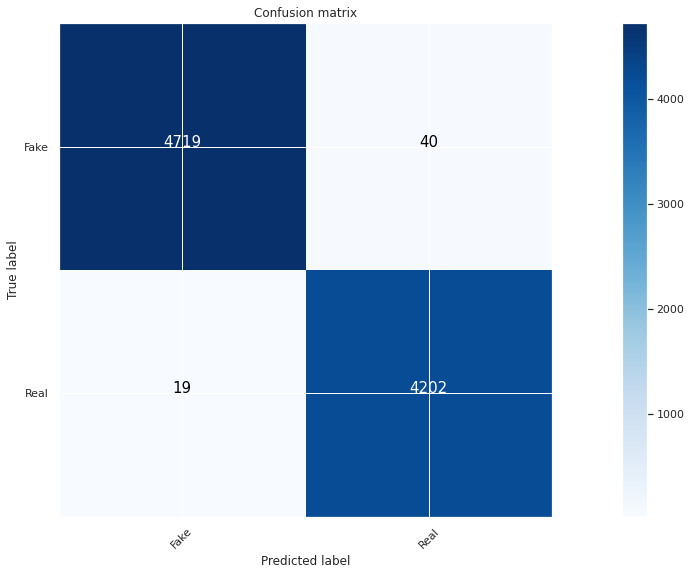

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [ ]:
#Logistic Regresssion
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(X_train)
xv_test = vectorization.transform(X_test)


LR = LogisticRegression()
LR.fit(xv_train,y_train)

pred_lr=LR.predict(xv_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, pred_lr)*100,2)))

accuracy: 98.91%


In [ ]:
LR.score(xv_test, y_test)

0.989086859688196

In [ ]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

        fake       0.99      0.99      0.99      4759
        true       0.99      0.99      0.99      4221

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



Confusion matrix, without normalization


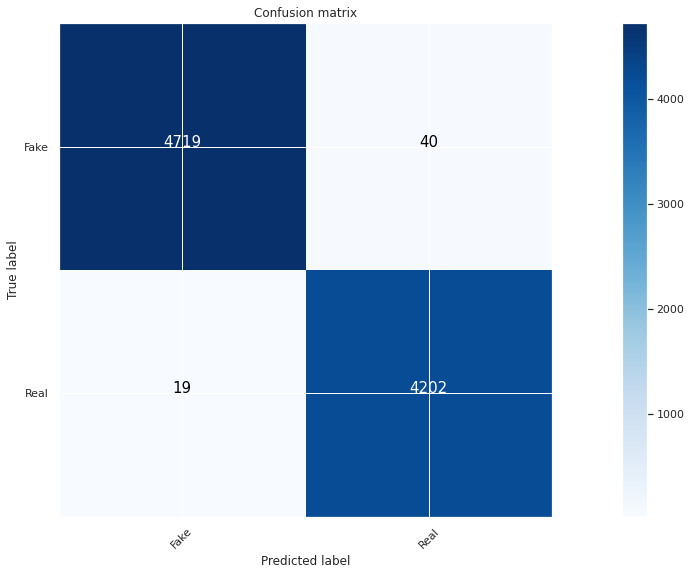

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [ ]:
#DataFlair - Build confusion matrix
confusion_matrix(y_test,y_pred, labels=['fake','true'])

array([[4719,   40],
       [  19, 4202]])

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [ ]:
pred_gbc = GBC.predict(xv_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, pred_gbc)*100,2)))

accuracy: 99.55%


In [ ]:
GBC.score(xv_test, y_test)

0.9955456570155902

In [ ]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

        fake       1.00      0.99      1.00      4759
        true       0.99      1.00      1.00      4221

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



Confusion matrix, without normalization


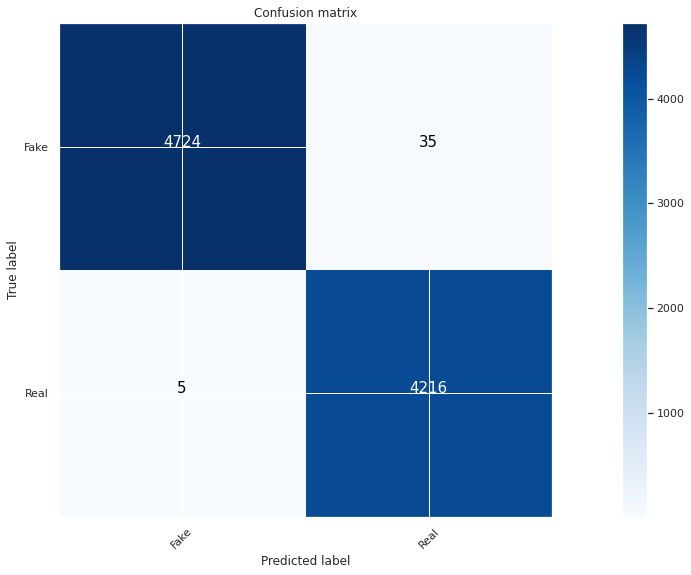

In [ ]:
cm = metrics.confusion_matrix(y_test, pred_gbc)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [ ]:
#DataFlair - Build confusion matrix
confusion_matrix(y_test,pred_gbc, labels=['fake','true'])

array([[4724,   35],
       [   5, 4216]])

In [ ]:
#Random forest classifier
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
pred_rfc = RFC.predict(xv_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, pred_rfc)*100,2)))

accuracy: 99.23%


In [ ]:
RFC.score(xv_test, y_test)

0.9923162583518931

In [ ]:
#DataFlair - Build confusion matrix
confusion_matrix(y_test,pred_rfc, labels=['fake','true'])

array([[4705,   54],
       [  15, 4206]])

Confusion matrix, without normalization


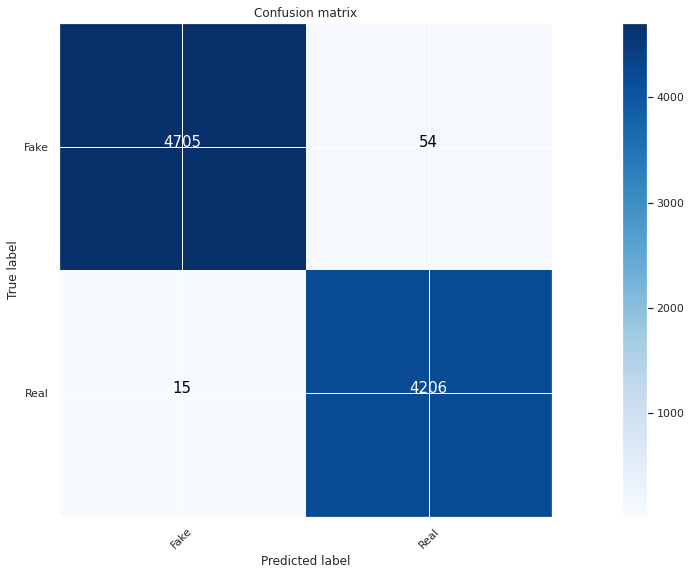

In [ ]:
cm = metrics.confusion_matrix(y_test, pred_rfc)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [ ]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

        fake       1.00      0.99      0.99      4759
        true       0.99      1.00      0.99      4221

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [ ]:
#naive based classifier
#let's implement the model : Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
classifier=MultinomialNB()

In [ ]:
classifier.fit(xv_train, y_train)
pred_nb = classifier.predict(xv_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, pred_nb)*100,2)))
score = metrics.accuracy_score(y_test, pred_nb)

accuracy: 94.96%


In [ ]:
print(classification_report(y_test,pred_nb))

              precision    recall  f1-score   support

        fake       0.97      0.94      0.95      4759
        true       0.93      0.96      0.95      4221

    accuracy                           0.95      8980
   macro avg       0.95      0.95      0.95      8980
weighted avg       0.95      0.95      0.95      8980



In [ ]:
#DataFlair - Build confusion matrix
confusion_matrix(y_test,pred_nb, labels=['fake','true'])

array([[4464,  295],
       [ 158, 4063]])

Confusion matrix, without normalization


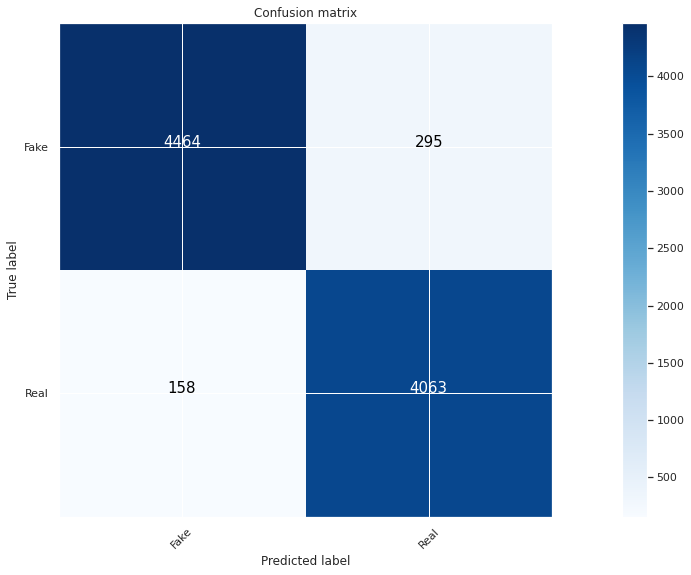

In [ ]:
cm = metrics.confusion_matrix(y_test, pred_nb)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [ ]:
#SVM
Tfidf_vect = TfidfVectorizer(max_features=3600, min_df=2, max_df=0.5, ngram_range=(1,1))


Tfidf_vect.fit(X_train)
train_x_tfidf = Tfidf_vect.transform(X_train)
test_x_tfidf = Tfidf_vect.transform(X_test)

clf = svm.SVC(C=1.9,kernel = "linear") #SVM Model, default C-value
clf.fit(train_x_tfidf, y_train)

svm_predictions = clf.predict(test_x_tfidf)
svm_cf_matrix = confusion_matrix(y_test, svm_predictions)

print("accuracy: {}%".format(round(accuracy_score(y_test, svm_predictions)*100,2)))

#accuracy = clf.score(X_test, y_test)
#print("This is the accuracy ", accuracy)

accuracy: 99.38%


Confusion matrix, without normalization


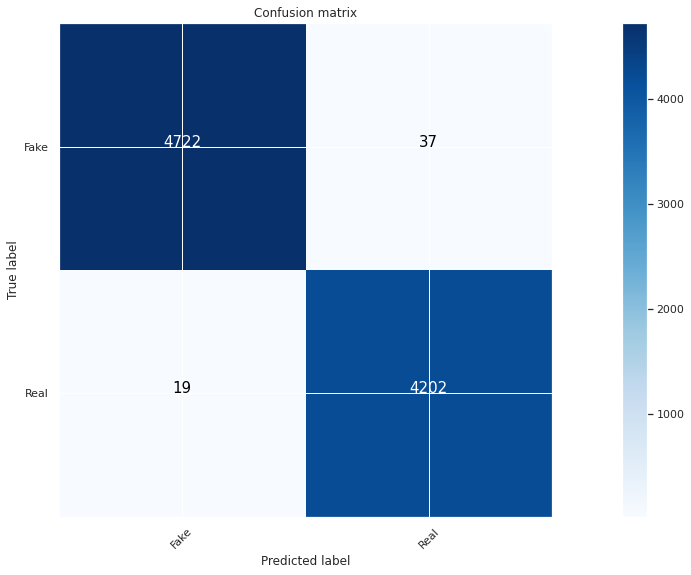

In [ ]:
cm = metrics.confusion_matrix(y_test, svm_predictions)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [ ]:
print(classification_report(y_test,svm_predictions))

              precision    recall  f1-score   support

        fake       1.00      0.99      0.99      4759
        true       0.99      1.00      0.99      4221

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [ ]:
#DataFlair - Build confusion matrix
confusion_matrix(y_test,svm_predictions, labels=['fake','true'])

array([[4722,   37],
       [  19, 4202]])